In [1]:
k=2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy import save
from numpy import load

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[0.67436247] [-0.44462513]
[0.23261889] [-0.10636811]


<function matplotlib.pyplot.show(*args, **kw)>

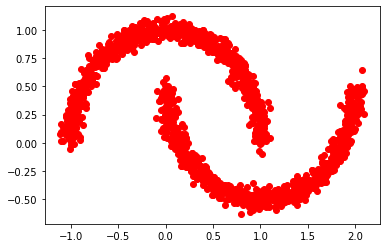

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Assignment5Dataset.csv")
data.head()
x1 = data[["X1"]].values
x2=data[["X2"]].values
print(x1[0],x2[0])
print(x1[10],x2[10])
for p in range(0,1500):
  plt.scatter(x1[p],x2[p],c="red")

plt.show

In [4]:
def distance(p1,p2):
  
  
  return np.dot((p1-p2).transpose(),(p1-p2))


In [5]:

mean=[]
indexing=[]
for i in range(0,k):
  j=random.randint(0, 1500)
  mean.append((data.loc[[j]]).values.transpose())
A = np.zeros([1500, k], dtype = int)
for p in range(0,1500):
  point=(data.loc[[p]]).values.transpose()
  d=[]
  for i in range(0,k):
    d.append(distance(point,mean[i]).tolist())
  ind=d.index(min(d))
  indexing.append(ind)
  A[p][ind]=1


flag=True

while flag:  
  A_new = np.zeros([1500, k], dtype = int)
  for i in range(0,k):
    n=0
    for p in range(0,1500):
      mean[i]+=A[p][i]*(data.loc[[p]]).values.transpose()
      n+=A[p][i]
    mean[i]=mean[i]/n

  for p in range(0,1500):
    point=(data.loc[[p]]).values.transpose()
    d=[]
    for i in range(0,k):
      d.append(distance(point,mean[i]).tolist())
    ind=d.index(min(d))
    indexing[p]=ind
    A_new[p][ind]=1
  if np.array_equal(A, A_new):
    flag=False
  A=A_new 
print(len(indexing))




1500


<function matplotlib.pyplot.show(*args, **kw)>

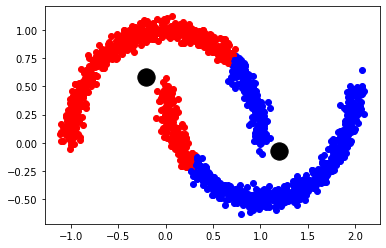

In [6]:
color=["red","blue","yellow"]

for p in range(0,1500):
  plt.scatter(x1[p],x2[p],c=color[indexing[p]])
for i in range(0,k):
 
  plt.scatter(mean[i][0],mean[i][1],s=300,c="black")




plt.show
